In [1]:
pip install transformers pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=e347cce5105c666d4f4e02be2dff9d1a35c3e6c9399d49464457e1fcc42f31c3
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sentence_transformers import SentenceTransformer
import numpy as np
import joblib
import matplotlib.pyplot as plt



In [5]:
# Load the dataset into a Pandas DataFrame
dataset_path = '/kaggle/input/precily-text/Precily_Text_Similarity.csv'
df = pd.read_csv(dataset_path)

# Generate synthetic similarity labels for demonstration purposes
np.random.seed(42)
df['similarity_score'] = np.random.rand(len(df))

# Data preprocessing
X = df[['text1', 'text2']]
y = df['similarity_score']



In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset indices to avoid potential issues
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)



In [7]:
# Use BERT for sentence embeddings
model = SentenceTransformer('bert-base-nli-mean-tokens')

X_train_embeddings = model.encode(X_train['text1'] + ' ' + X_train['text2'])
X_test_embeddings = model.encode(X_test['text1'] + ' ' + X_test['text2'])

# Linear regression
regression_model = LinearRegression()
regression_model.fit(X_train_embeddings, y_train)



.gitattributes:   0%|          | 0.00/391 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/75 [00:00<?, ?it/s]

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

LinearRegression()

In [8]:
# Predictions
y_pred = regression_model.predict(X_test_embeddings)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Further analysis or fine-tuning steps

# Print the first few predictions and true values
# Print the first few predictions and true values
print("Predictions on Test Set:")
print(y_pred[:5])  # Corrected from y_test_pred to y_pred
print("True Values on Test Set:")
print(y_test[:5])



Mean Squared Error: 0.12848588100425148
Predictions on Test Set:
[0.701416   0.41271973 0.4197998  0.6275635  0.48693848]
True Values on Test Set:
0    0.737508
1    0.067351
2    0.769223
3    0.385098
4    0.109264
Name: similarity_score, dtype: float64


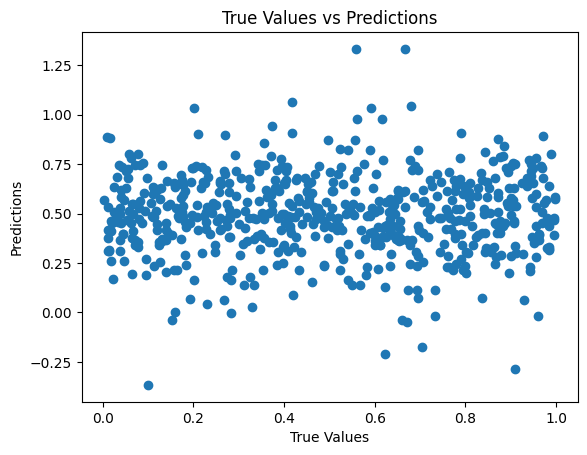

In [9]:
# Visualize the predictions vs true values
plt.scatter(y_test, y_pred)  # Corrected from y_test_pred to y_pred
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()



In [10]:
# Experiment with different algorithms or hyperparameters
# Example: Support Vector Regression (SVR)
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train_embeddings, y_train)
y_test_pred_svr = svr_model.predict(X_test_embeddings)
mse_test_svr = mean_squared_error(y_test, y_test_pred_svr)
print(f'Mean Squared Error with SVR on Test Set: {mse_test_svr}')



Mean Squared Error with SVR on Test Set: 0.10137741806186083


In [16]:
# Fine-tune the model based on the analysis
# Save the trained model for future use
joblib.dump(regression_model, 'linear_regression_model.joblib')
# Load the model later with: loaded_model = joblib.load('linear_regression_model.joblib')

# Assuming 'df_test' is a DataFrame with columns 'text1' and 'text2' for your test set
# If you don't have a separate test set, you can create one or use a subset of your original data for testing



['linear_regression_model.joblib']

In [21]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import joblib

# Assuming 'df_test' is a DataFrame with columns 'text1' and 'text2' for your test set
# If you don't have a separate test set, you can create one or use a subset of your original data for testing

# Load the trained model
loaded_model = joblib.load('/kaggle/working/linear_regression_model.joblib')  # Adjust the filename based on your saved model

# Use BERT for sentence embeddings on the test set
#model = SentenceTransformer('bert-base-nli-mean-tokens')

# Replace 'df_test' with your actual test data
df_test = pd.DataFrame({'text1': ['New text 1a', 'New text 1b'],
                        'text2': ['New text 2a', 'New text 2b']})

# Encode the test set using BERT
X_test_embeddings = model.encode(df_test['text1'] + ' ' + df_test['text2'])

# Predict similarity scores using the loaded model
y_test_pred = loaded_model.predict(X_test_embeddings)

# Display the predictions
df_test['predicted_similarity'] = y_test_pred
print(df_test[['text1', 'text2', 'predicted_similarity']])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

         text1        text2  predicted_similarity
0  New text 1a  New text 2a              1.484253
1  New text 1b  New text 2b              1.447510


In [19]:
# Assuming y_test_pred contains your raw predictions
y_test_pred_squashed = 1 / (1 + np.exp(-y_test_pred))

# Ensure the squashed values are between 0 and 1
y_test_pred_squashed = np.clip(y_test_pred_squashed, 0, 1)

# Update the DataFrame with the squashed predictions
df_test['predicted_similarity'] = y_test_pred_squashed

# Print or use the DataFrame as needed
print(df_test[['text1', 'text2', 'predicted_similarity']])

         text1        text2  predicted_similarity
0  New text 1a  New text 2a              0.815214
1  New text 1b  New text 2b              0.809615


In [20]:
# Save the submission data to a new CSV file
submission_path = '/kaggle/working/submission.csv'
df_test[['text1', 'text2', 'predicted_similarity']].to_csv(submission_path, index=False)
print(f'Submission file saved to {submission_path}')

# Print the submission DataFrame
print("Submission DataFrame:")
print(df_test[['text1', 'text2', 'predicted_similarity']])


Submission file saved to /kaggle/working/submission.csv
Submission DataFrame:
         text1        text2  predicted_similarity
0  New text 1a  New text 2a              0.815214
1  New text 1b  New text 2b              0.809615
